In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#### Read in both Training CSV and Test CSV for Kaggle

In [2]:
modelnum = 'four'

In [3]:
# read in Training csv
df = pd.read_csv('../datasets/train.csv')
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,...,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,...,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,...,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,...,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,...,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [4]:
# Read in Test CSV for Kaggle
df_test = pd.read_csv('../datasets/test.csv')
df_test = df_test.reindex(sorted(df_test.columns), axis=1)
df_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,Sale Type,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,908,1020,0,Grvl,4,2fmCon,TA,No,0,0,...,WD,0,Pave,9,1020,AllPub,0,1910,1950,2006
1,1967,0,0,NaN,6,Duplex,TA,No,0,0,...,WD,0,Pave,10,1967,AllPub,170,1977,1977,2006
2,664,832,0,NaN,3,1Fam,Gd,Av,1,0,...,New,0,Pave,7,654,AllPub,100,2006,2006,2006
3,968,0,0,NaN,2,1Fam,TA,No,0,0,...,WD,0,Pave,5,968,AllPub,0,1923,2006,2007
4,1394,0,0,NaN,3,1Fam,TA,No,1,0,...,WD,185,Pave,6,1394,AllPub,0,1963,1963,2009


#### Useful for EDA

In [5]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

#### Data Cleaning & EDA

In [6]:
# Engineer columns on df

df['Garage Area'].fillna(0, inplace=True)
df['Garage Cars'].fillna(0, inplace=True)
df['Yr Built or Remod'] = df['Year Remod/Add'] * df['Year Built']
df['Overall Qual Sq'] = (df['Overall Qual']**2)
df['Garage Total'] = df['Garage Area'] * df['Garage Cars']
df['SQRT 1st SQ'] = (df['1st Flr SF']**0.5)

# Engineer columns on df_test

df_test['Garage Area'].fillna(0, inplace=True)
df_test['Garage Cars'].fillna(0, inplace=True)
df_test['Yr Built or Remod'] = df_test['Year Remod/Add'] * df_test['Year Built']
df_test['Overall Qual Sq'] = (df_test['Overall Qual']**2)
df_test['Garage Total'] = df_test['Garage Area'] * df_test['Garage Cars']
df_test['SQRT 1st SQ'] = (df_test['1st Flr SF']**0.5)

In [7]:
features = ['Yr Built or Remod','Overall Qual Sq', 'Garage Total', 'SQRT 1st SQ']

X = df[features]
y = df['SalePrice']

In [8]:
# Fitting polynomial model to Training data

poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)
poly_columns = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

In [9]:
# Fitting polynomial model to Testing data

features_test = ['Yr Built or Remod', 'Overall Qual Sq', 'Garage Total', 'SQRT 1st SQ']

X_before_test = df_test[features_test]

poly = PolynomialFeatures(include_bias=False)
X_poly_test = poly.fit_transform(X_before_test)
X_poly_test_df = pd.DataFrame(X_poly_test, columns=poly.get_feature_names(features_test))
featpoly = list(X_poly_test_df)

X_after_test = X_poly_test_df[featpoly]

X_poly_test_df['Id'] = df_test['Id']
X_poly_test_df.head()

,Yr Built or Remod,Overall Qual Sq,Garage Total,SQRT 1st SQ,Yr Built or Remod^2,Yr Built or Remod Overall Qual Sq,Yr Built or Remod Garage Total,Yr Built or Remod SQRT 1st SQ,Overall Qual Sq^2,Overall Qual Sq Garage Total,Overall Qual Sq SQRT 1st SQ,Garage Total^2,Garage Total SQRT 1st SQ,SQRT 1st SQ^2,Id
0,3724500.0,36.0,440.0,30.133038,1.387190e+13,134082000.0,1.638780e+09,1.122305e+08,1296.0,15840.0,1084.789380,193600.0,13258.536873,908.0,2658
1,3908529.0,25.0,1160.0,44.350874,1.527660e+13,97713225.0,4.533894e+09,1.733467e+08,625.0,29000.0,1108.771843,1345600.0,51447.013519,1967.0,2718
2,4024036.0,49.0,852.0,25.768197,1.619287e+13,197177764.0,3.428479e+09,1.036922e+08,2401.0,41748.0,1262.641675,725904.0,21954.504230,664.0,2414
3,3857538.0,25.0,960.0,31.112698,1.488060e+13,96438450.0,3.703236e+09,1.200184e+08,625.0,24000.0,777.817459,921600.0,29868.190437,968.0,1989
4,3853369.0,36.0,1028.0,37.336309,1.484845e+13,138721284.0,3.961263e+09,1.438706e+08,1296.0,37008.0,1344.107139,1056784.0,38381.726069,1394.0,625


#### Correlations and pairplots for use in Feature Engineering

In [10]:
df.corr()['SalePrice'].sort_values(ascending=False).head()

SalePrice          1.000000
Overall Qual Sq    0.825539
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Total       0.690596
Name: SalePrice, dtype: float64

In [11]:
df['SQRT 1st SQ'] = (df['1st Flr SF']**0.5)

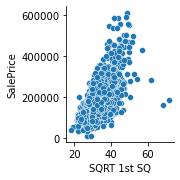

In [12]:
sns.pairplot(df, x_vars=['SQRT 1st SQ'], y_vars=['SalePrice']);

#### Feature Engineering

In [13]:
# Engineer columns on df

df['Yr Built or Remod'] = df['Year Remod/Add'] * df['Year Built']
df['Lot Size House Sqft'] = df['Lot Area'] * df['Gr Liv Area']
df['Overall Qual Sq'] = (df['Overall Qual']**2)
df['Garage Total'] = df['Garage Area'] * df['Garage Cars']

#### Modeling

In [14]:
# Instantiate the model

lr = LinearRegression()

In [15]:
X = poly_columns[featpoly]

In [16]:
# Train, Test, Split

X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=42)

In [17]:
# Fit the model

lr.fit(X, y)

LinearRegression()

In [18]:
# Train Score

lr.score(X_train, y_train)

0.7851285674102441

In [19]:
# Test Score

lr.score(X_validate, y_validate)

0.8286989464156638

In [20]:
# Cross-Val-score

cross_val_score(lr, X_train, y_train).mean()

0.7639874889484722

#### Predictions

In [34]:
preds = lr.predict(X_validate)
preds;

In [24]:
# Residuals
residuals = y_validate - preds

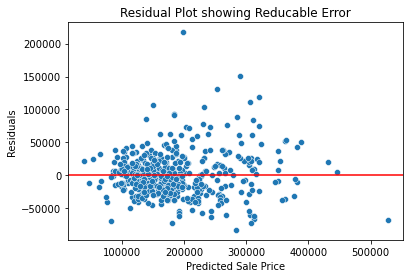

In [25]:
# Plot residuals to evaluate Epsilon (irreducable error)

plt.axhline(y=0, color='r')
sns.scatterplot(x = preds, y = residuals)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot showing Reducable Error');

714.8646536398721

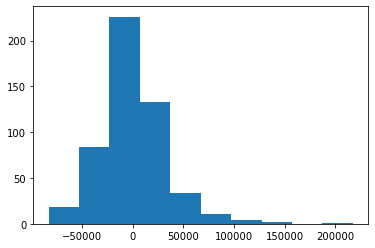

In [26]:
# Hist of residuals
plt.hist(residuals)
residuals.mean()

#### Modify Test Using Poly from Above

In [27]:
test_preds = lr.predict(X_poly_test_df[featpoly])
test_preds;

In [28]:
# Create target column (SalePrice) in X_poly_test_df
X_poly_test_df['SalePrice'] = test_preds

In [29]:
X_poly_test_df['SalePrice'].describe()

count       878.000000
mean     177986.975807
std       67558.756079
min       44071.599928
25%      130725.621782
50%      161745.657554
75%      207595.175962
max      474224.145116
Name: SalePrice, dtype: float64

In [30]:
kaggle_submission = X_poly_test_df[['Id', 'SalePrice']]

In [31]:
kaggle_submission.set_index('Id', inplace=True)
kaggle_submission.head()

,SalePrice
Id,
2658,124576.027459
2718,175160.921842
2414,171509.277953
1989,137787.230143
625,178444.174221


In [32]:
# Save Kaggle Submission to CSV

kaggle_submission.to_csv(f'../kaggle_submissions/model_{modelnum}.csv')

In [33]:
# Save df to CSV

df[features].to_csv(f'../clean_data/model_{modelnum}.csv', index=0)